In [1]:
#-Step 1: Read and access data
#-Step 2: Identify the variables (i.e dependent and independent variable)
#-Step 3: Dividing the data into training and test data
#-Step 4: Creating the model using on the training data set
#-Step 5: Find the values of slope, intercept and R Square
#-Step 6: Predict the values on test data using your model
#-Step 7: Calculate the RMSE value from test data 
#-Step 8: Predict the values for your validation data using model and RMSE

 ABC Inc an IT firm operating in telecom domain . They have around 5000 employees in India. Lately they have started benchmarking employee ctc against last CTC. The HR has the ctc data.  Help them to perform an analysis which will show the relationship between Last CTC and employee CTC. Predict what CTC can be offered to a candidate with 6 lakhs of Last ctc.

In [2]:
import pandas as pd

In [3]:
import os

In [4]:
os.chdir("E:\SkillEnable Class\Python\Datasets")

In [5]:
ctc = pd.read_csv("CTCdata.csv")

In [6]:
ctc

,CTCoffered,LastCTC,Interview rating,Skill Set Index,Highest qualification,Total years of work exp
0,19,18,4,3,3,8.5
1,17,16,4,3,3,7.7
2,17,16,4,3,3,7.9
3,9,8,3,1,2,2.7
4,10,9,5,4,4,9.7
...,...,...,...,...,...,...
186,7,5,4,2,2,5.5
187,21,19,3,2,2,5.3
188,14,14,5,4,4,10.3
189,10,8,5,4,4,9.5


In [7]:
ctc1 = ctc[["CTCoffered","LastCTC"]]

In [8]:
ctc1

,CTCoffered,LastCTC
0,19,18
1,17,16
2,17,16
3,9,8
4,10,9
...,...,...
186,7,5
187,21,19
188,14,14
189,10,8


In [9]:
Y = ctc1[['CTCoffered']]

In [10]:
X = ctc1[['LastCTC']]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 7)

len(X_train), len(X_test), len(Y_train), len(Y_test)

(152, 39, 152, 39)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
slr = LinearRegression()

In [14]:
model = slr.fit(X_train, Y_train)

In [15]:
model

LinearRegression()

In [16]:
m = model.coef_

In [17]:
C = model.intercept_

In [18]:
print(m, C)

[[0.94634628]] [1.7260295]


In [19]:
r_sq = model.score(X_train, Y_train)

In [20]:
r_sq

0.9721021671092424

In [21]:
X_test.head()

,LastCTC
22,16
158,6
46,14
78,6
24,14


In [22]:
Y_test.head().reset_index()

,index,CTCoffered
0,22,16
1,158,8
2,46,14
3,78,8
4,24,14


In [23]:
Y_test['CTC_Pred'] = model.predict(X_test)

import warnings
warnings.filterwarnings('ignore')

In [24]:
Y_test.head()

,CTCoffered,CTC_Pred
22,16,16.867570
158,8,7.404107
46,14,14.974877
78,8,7.404107
24,14,14.974877


In [25]:
# RMSE(Root Mean Square Error) value from test data
import math

In [26]:
Y_test['Error'] = Y_test['CTCoffered'] - Y_test['CTC_Pred']
Y_test['Sq_Error'] = (Y_test['Error']) ** 2

In [27]:
Y_test.head()

,CTCoffered,CTC_Pred,Error,Sq_Error
22,16,16.867570,-0.867570,0.752678
158,8,7.404107,0.595893,0.355088
46,14,14.974877,-0.974877,0.950386
78,8,7.404107,0.595893,0.355088
24,14,14.974877,-0.974877,0.950386


In [28]:
Error_mean = Y_test['Sq_Error'].mean()

In [29]:
Error_mean ** (0.5)

0.7288352044278015

In [30]:
RMSE = math.sqrt(Error_mean)

In [31]:
RMSE

0.7288352044278015

In [32]:
# Lower Range = Predicted value - RMSE
# Upper Range = Predicted value + RMSE


In [33]:
val_data = pd.DataFrame({"LastCTC" : [7]})

In [34]:
Predict_CTC = model.predict(val_data)

In [35]:
Predict_CTC

array([[8.35045346]])

In [36]:
print('Upper Range of CTC is ', Predict_CTC + RMSE)
print('Lower Range of CTC is ', Predict_CTC - RMSE)

Upper Range of CTC is  [[9.07928867]]
Lower Range of CTC is  [[7.62161826]]


In [37]:
import seaborn as sns

<AxesSubplot:xlabel='CTCoffered', ylabel='CTC_Pred'>

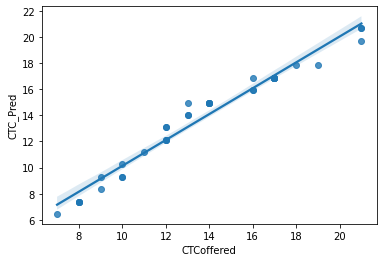

In [38]:
sns.regplot( data = Y_test, x = 'CTCoffered', y = 'CTC_Pred')